# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

There will be 15 elixirs that user will get out of the 100 loot boxes.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

1/0.15 = 6.7 (~7)

7 loot boxes have to be purchased in order to definitely get elixir.

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

x will be a discrete random variable as the outcome of this event won't have decimal places where the outcome will be either an elixir or nothing.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial distribution looks at the probability of successful events where the events have 2 outcomes (getting an elixir or nothing). Therefore, this distribution will be best suited for event X.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [134]:
n = 100 #out of 100 loot boxes that users earn
p = 0.15 #15% probability that a loot box contains an elixir
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [60]:
possible_boxes = list(range(0,21))
add_pmf = 0 #less than 20

for i in possible_boxes:
    add_pmf += stats.binom.pmf(i,n,p)
pmf_20_or_more = 1 - add_pmf
pmf_20_or_more 

0.06631976581888166

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

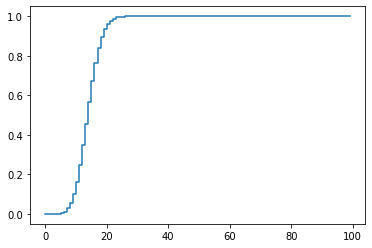

In [5]:
# Show your work; leave your answer in a comment.
plt.step(possible_boxes,stats.binom.cdf(possible_boxes))

In [14]:
p_below_20 = elix_dist.cdf(possible_boxes)[20]
p_above_20 = 1 - p_below_20
p_above_20

0.06631976581888166

Therefore, there is 6.63% probability of getting more than 20 elixirs in 100 loot boxes

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

There will be 6 - 7 chances out of 100 boxes that user gets more than 20 elixirs.

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Poisson distribution refers to the rate of successful event in fixed period of time (last month). 

The rate of loot boxes purchased will be the successful event that we refer to and is independent

Thus, Poisson distribution will suit this study.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [131]:
import math
user_lmd = 2.7
boxes = 500_000 #if we want revenue of $500,000, we will need to sell 500,000 loot boxes
user_req = boxes/user_lmd
math.ceil(user_req/1000) * 1000



186000

In order to have $500,000 revenue, we will need at least 186,000 users.

#### 4c. Assume that your platform has the numer of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [130]:
#Money from low value user
money_low = 0 
for i in range(0,5):
    money_low += stats.poisson.pmf(i,user_lmd)*user*i
    
p_low_user = stats.poisson.cdf(4,user_lmd)
money_low

358617.0905944612

In [128]:
# High value user p(x>=5)
p_high_user = 1 - p_low_user
p_high_user

0.1370921373174332

In [133]:
#Money from low value user
money_high = boxes - money_low
money_high

141382.9094055388

Assuming that we have 186k users, we can expect $358,617.09 from low value users and $141,382.91 from high value users

#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

- There will be 6-7 chances that a user can get > 20 elixirs out of 100 loot boxes
- Considering a target revenue of $500k and assuming that we have 186k users, low value customer (purchased < 4 loot boxes) is expected to bring 86.3% of the revenue.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [137]:
import numpy as np
p = 0.15
loot_boxes = []
n = 100_000

for i in range(n):
    elixir = np.random.choice([1,0], p = [p,(1-p)]) #assuming elixir = 1 and nothing = 0
    count_loot = 1
    while elixir != 1:
        elixir = np.random.choice([1,0], p = [p,(1-p)])
        count_loot += 1
    loot_boxes.append(count_loot)

loot_boxes[:3]



[6, 1, 8]

In [138]:
percentile_5 = np.percentile((loot_boxes),5)
percentile_25 = np.percentile((loot_boxes),25)
percentile_50 = np.percentile((loot_boxes),50)
percentile_75 = np.percentile((loot_boxes),75)
percentile_95 = np.percentile((loot_boxes),95)
print(f'Percentile: 5th - {percentile_5}, 25th - {percentile_25}, 50th - {percentile_50}, 75th - {percentile_75}, 95th - {percentile_95}')

Percentile: 5th - 1.0, 25th - 2.0, 50th - 5.0, 75th - 9.0, 95th - 19.0


**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**NOTE**: When your Jupyter notebook is open, double-click on this Markdown cell! You can delete this text and put your answer to the previous problem in here.

To do this the best way to store this data is by using dictionary by referring the magical elixir, golden pendant, steel armor, and bronze coin as the key and number of trials as value. Then, we can process the value to calculate the average of trials for each item.


#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Important metrics to measure is the revenue.

Why do I choose those metrics? 
Assuming that user is expecting to get elixir when purchasing a loot box, the rarity of elixir will attract user to buy. 
However, the downside of a very low probability of getting an elixir might lower the potential of re-purchase. 